In [1]:
from datetime import datetime, timedelta, date
import pandas as pd
from constants import *
from phe import pickle, query, download, plot_summary

In [2]:
specimen_date = 'date'
ltla = 'ltla'
nation = 'nation'

In [10]:
overview_data = query(
    filters={area_type: overview},
    structure=[release_timestamp, specimen_date, area_name, area_code,
               new_cases_by_specimen_date, new_admissions, new_deaths_by_death_date,
               new_virus_tests]
)
overview_data

,releaseTimestamp,date,areaName,areaCode,newCasesBySpecimenDate,newAdmissions,newDeaths28DaysByDeathDate,newVirusTests
0,2020-12-22,2020-12-21,United Kingdom,K02000001,2235,NaN,147.0,423675.0
1,2020-12-22,2020-12-20,United Kingdom,K02000001,15762,NaN,252.0,433470.0
2,2020-12-22,2020-12-19,United Kingdom,K02000001,19222,NaN,288.0,440584.0
3,2020-12-22,2020-12-18,United Kingdom,K02000001,31068,1875.0,336.0,390130.0
4,2020-12-22,2020-12-17,United Kingdom,K02000001,33209,2095.0,442.0,375185.0
...,...,...,...,...,...,...,...,...
341,2020-12-22,2020-01-15,United Kingdom,K02000001,0,NaN,NaN,NaN
342,2020-12-22,2020-01-14,United Kingdom,K02000001,0,NaN,NaN,NaN
343,2020-12-22,2020-01-13,United Kingdom,K02000001,0,NaN,NaN,NaN
344,2020-12-22,2020-01-12,United Kingdom,K02000001,0,NaN,NaN,NaN


In [13]:
download('england', 'nation', new_admissions_sum, new_cases_sum, new_deaths_sum, unique_people_tested_sum, area_name='England')

PosixPath('/Users/chris/Downloads/england_2020-12-22.csv')

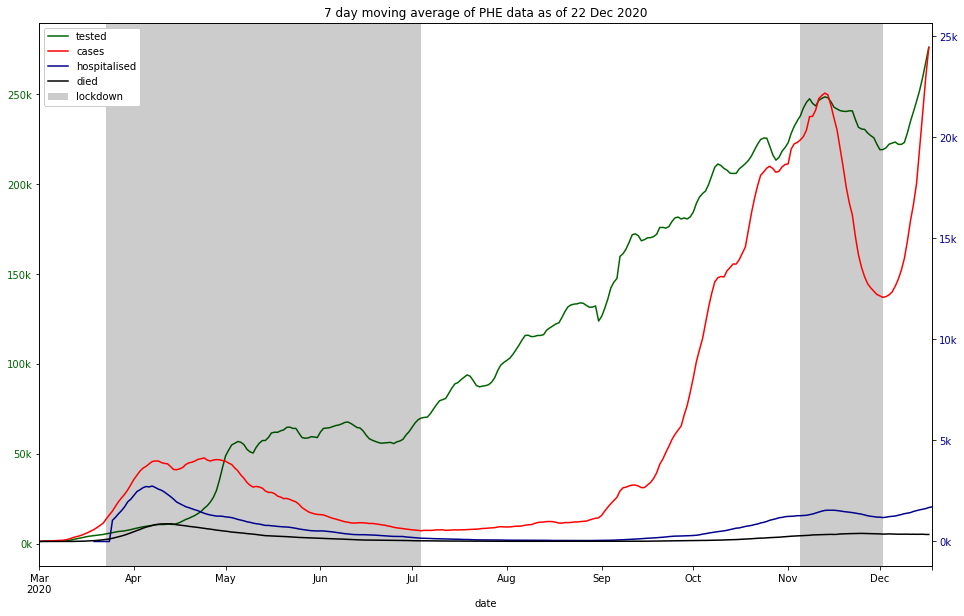

In [5]:
plot_summary(earliest_date='2020-03-01', tested_formatter=lambda y, pos: f"{y / 1_000:,.0f}k")

In [14]:
download('msoa', 'msoa', new_cases_sum, new_cases_rate, new_cases_change)

PosixPath('/Users/chris/Downloads/msoa_2020-12-22.csv')

In [15]:
area_data = query(
    filters={area_type: ltla}, 
    structure=[release_timestamp, specimen_date, area_name, area_code, new_cases_by_specimen_date, new_deaths_by_death_date],
    max_workers=10
)
area_data

,releaseTimestamp,date,areaName,areaCode,newCasesBySpecimenDate,newDeaths28DaysByDeathDate
0,2020-12-22,2020-12-21,Aberdeen City,S12000033,13.0,0.0
1,2020-12-22,2020-12-20,Aberdeen City,S12000033,51.0,0.0
2,2020-12-22,2020-12-19,Aberdeen City,S12000033,41.0,1.0
3,2020-12-22,2020-12-18,Aberdeen City,S12000033,57.0,0.0
4,2020-12-22,2020-12-17,Aberdeen City,S12000033,69.0,1.0
...,...,...,...,...,...,...
110903,2020-12-22,2020-06-24,Vale of Glamorgan,W06000014,0.0,NaN
110904,2020-12-22,2020-06-23,Vale of Glamorgan,W06000014,1.0,NaN
110905,2020-12-22,2020-06-22,Vale of Glamorgan,W06000014,7.0,NaN
110906,2020-12-22,2020-06-21,Vale of Glamorgan,W06000014,1.0,NaN


In [16]:
pickle('area', area_data)

PosixPath('/Users/chris/Downloads/phe_area_2020-12-22_2020-12-22-19-14.pickle')